In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
confirmed = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
deaths = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [4]:
recovered = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [5]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
confirmed.drop(['Lat', 'Long'], axis=1, inplace=True)

In [7]:
recovered.drop(['Lat', 'Long'], axis=1, inplace=True)

In [8]:
deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

In [9]:
recovered.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [10]:
confirmed.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [11]:
deaths.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [12]:
confirmed[~confirmed['province'].isnull()].country.value_counts()

US                116
Mainland China     31
Australia           8
Canada              4
Macau               1
Taiwan              1
Others              1
Hong Kong           1
Name: country, dtype: int64

In [13]:
df = confirmed.copy()

In [14]:
df_uc = df[((df.country == 'Mainland China') |  (df.country == 'US'))]

In [15]:
df_no_uc = df[~((df.country == 'Mainland China') |  (df.country == 'US'))]

In [16]:
df_uc[~df_uc['province'].isnull()].country.value_counts()

US                116
Mainland China     31
Name: country, dtype: int64

In [17]:
df_united = df_no_uc.groupby('country').sum()

In [54]:
import datetime
from dateutil.parser import parse as parse_date

In [130]:
def removeSome(df):
    df = df.copy()
    df = df[~df.country.str.contains('Others')]
    
    # df_no_uc = df[~((df.country == 'Mainland China') |  (df.country == 'US'))]
    df_no_uc = df.copy()
    df_united = df_no_uc.groupby('country').sum()
    
    idx_list = df_united.index.tolist()
    pos = idx_list.index('Mainland China')
    idx_list[pos] = 'Mainland China/Total'
    pos = idx_list.index('US')
    idx_list[pos] = 'US/Total'
    df_united.index = idx_list
    
    df_united.index.rename('place', inplace=True)

    df_uc = df[((df.country == 'Mainland China') |  (df.country == 'US'))]
    df_uc = df_uc[~df_uc.province.str.contains('Diamond Princess')]
    df_uc['place'] = df_uc['country'] + '/' + df_uc.province.apply(lambda x: x.split(', ')[-1])
    df_uc.drop(['province', 'country'], axis=1, inplace=True)
    # We need to sum because US provinces repeat
    df_uc_sum = df_uc.groupby('place').sum()
    # df_uc.set_index('place', inplace=True)
    
    ret = pd.concat([df_united, df_uc_sum])
    ret.columns = [parse_date(x) for x in ret.columns]
    return ret
con = removeSome(confirmed)
rec = removeSome(recovered)
dea = removeSome(deaths)

In [131]:
con[con.index.str.contains('China')]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
place,,,,,,,,,,,,,,,,,,,,,
Mainland China/Total,547,639,916,1399,2062,2863,5494,6070,8124,9783,...,79251,79826,80026,80151,80271,80422,80573,80652,80699,80735
Mainland China/Anhui,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
Mainland China/Beijing,14,22,36,41,68,80,91,111,114,139,...,411,413,414,414,418,418,422,426,428,428
Mainland China/Chongqing,6,9,27,57,75,110,132,147,182,211,...,576,576,576,576,576,576,576,576,576,576
Mainland China/Fujian,1,5,10,18,35,59,80,84,101,120,...,296,296,296,296,296,296,296,296,296,296
Mainland China/Gansu,0,2,2,4,7,14,19,24,26,29,...,91,91,91,91,91,102,119,120,124,124
Mainland China/Guangdong,26,32,53,78,111,151,207,277,354,436,...,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
Mainland China/Guangxi,2,5,23,23,36,46,51,58,78,87,...,252,252,252,252,252,252,252,252,252,252
Mainland China/Guizhou,1,3,3,4,5,7,9,9,12,29,...,146,146,146,146,146,146,146,146,146,146


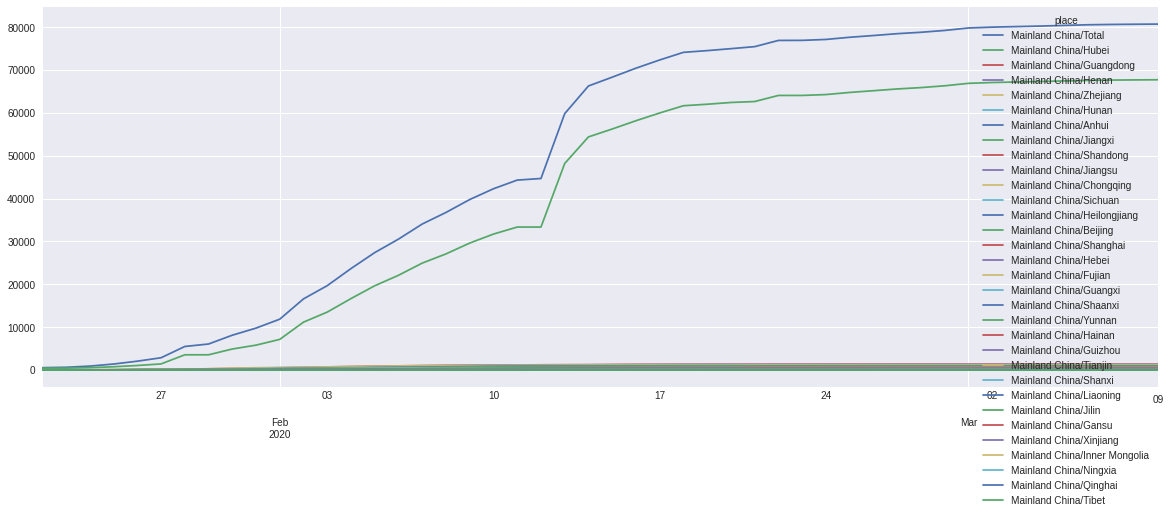

In [132]:
con[con.index.str.contains('China')].sort_values('3/1/20', ascending=False).T.plot()

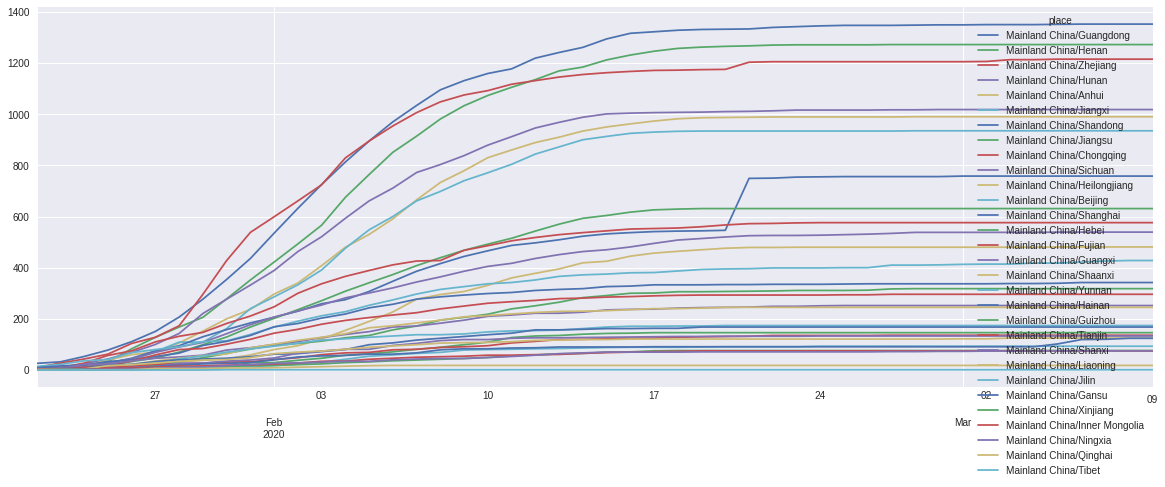

In [102]:
con[con.index.str.contains('China') & (~con.index.str.contains('Hubei')) & (~con.index.str.contains('Total'))].sort_values('3/1/20', ascending=False).T.plot()

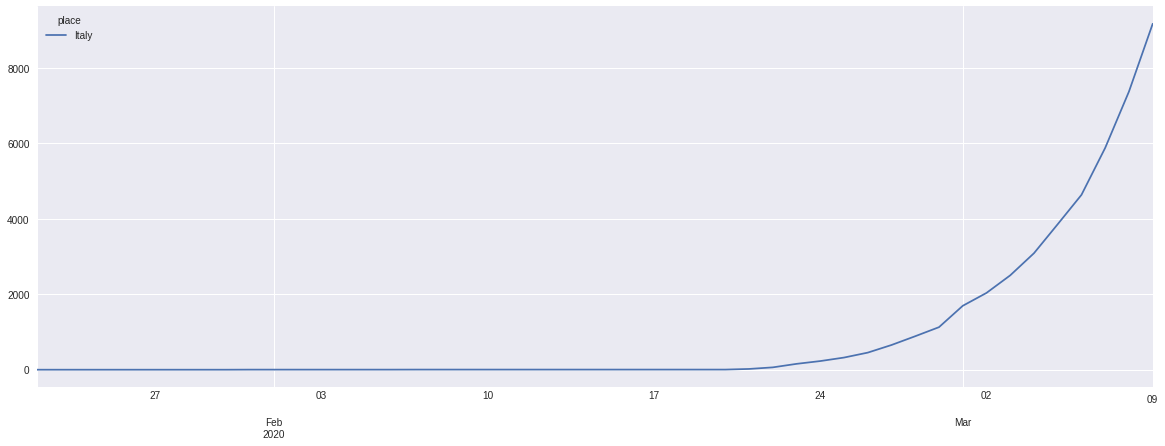

In [103]:
con[con.index.str.contains('Italy')].sort_values('3/1/20', ascending=False).T.plot()

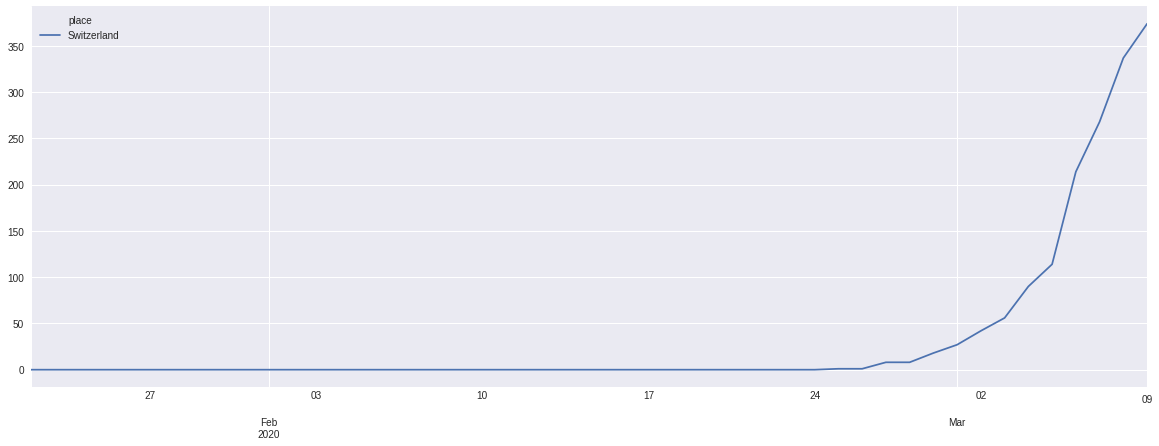

In [104]:
con[con.index.str.contains('Switzerland')].sort_values('3/1/20', ascending=False).T.plot()

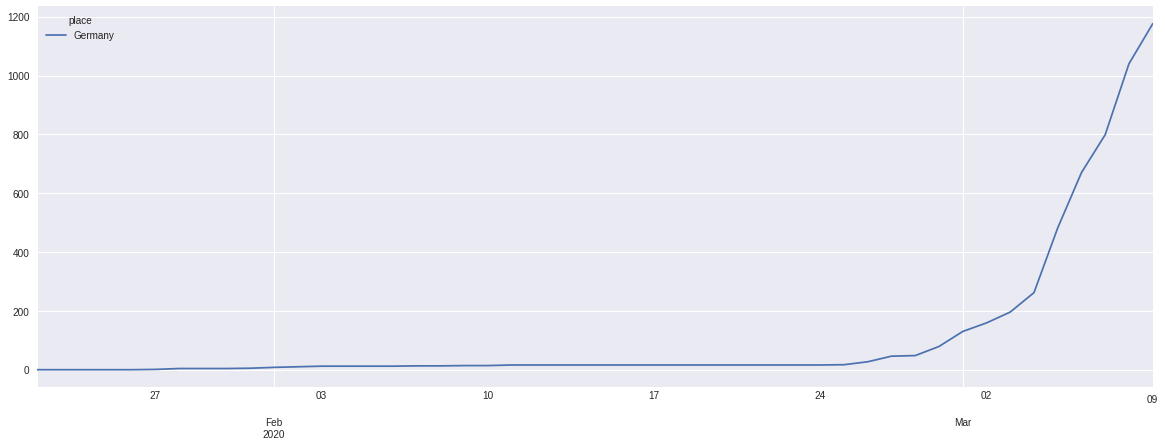

In [105]:
con[con.index.str.contains('Germany')].sort_values('3/1/20', ascending=False).T.plot()

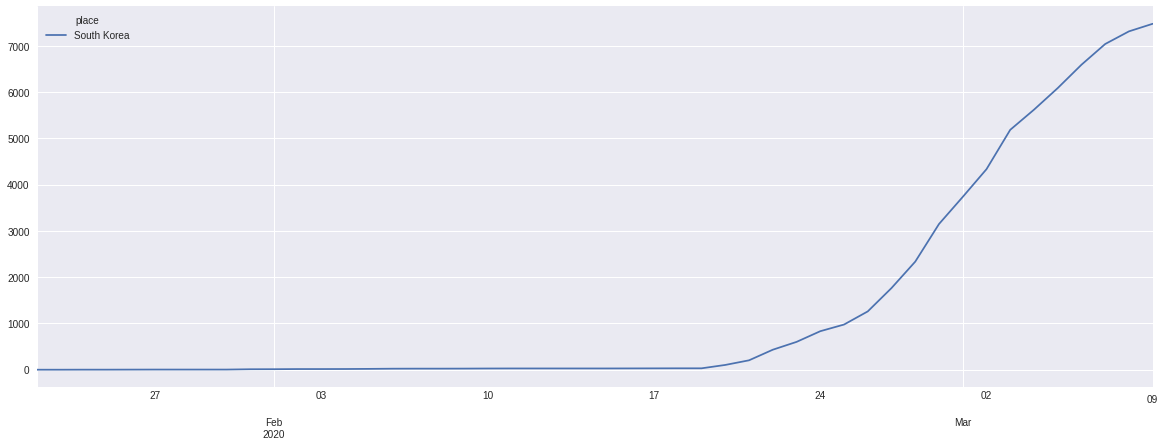

In [106]:
con[con.index.str.contains('Korea')].sort_values('3/1/20', ascending=False).T.plot()

In [107]:
dea[dea.index.str.contains('Korea')][dea.columns[:-10]]


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28
place,,,,,,,,,,,,,,,,,,,,,
South Korea,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,6,8,10,12,13,13


In [108]:
rec[dea.index.str.contains('Korea')]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
place,,,,,,,,,,,,,,,,,,,,,
South Korea,0,0,0,0,0,0,0,0,0,0,...,27,30,30,30,41,41,135,135,118,118


In [114]:
def plotRatio(country, days):
    fig, ax = plt.subplots()
    ax.plot(con[con.index.str.contains(country)][con.columns[-days:]].T, color='blue', label='Confirmed')
    ax.plot((dea[dea.index.str.contains(country)][con.columns[-days:]]*10).T, color='red', label='Dead*10')
    ax.plot((rec[rec.index.str.contains(country)][con.columns[-days:]]*10).T, color='green', label='recovered*10')
    ax.legend()

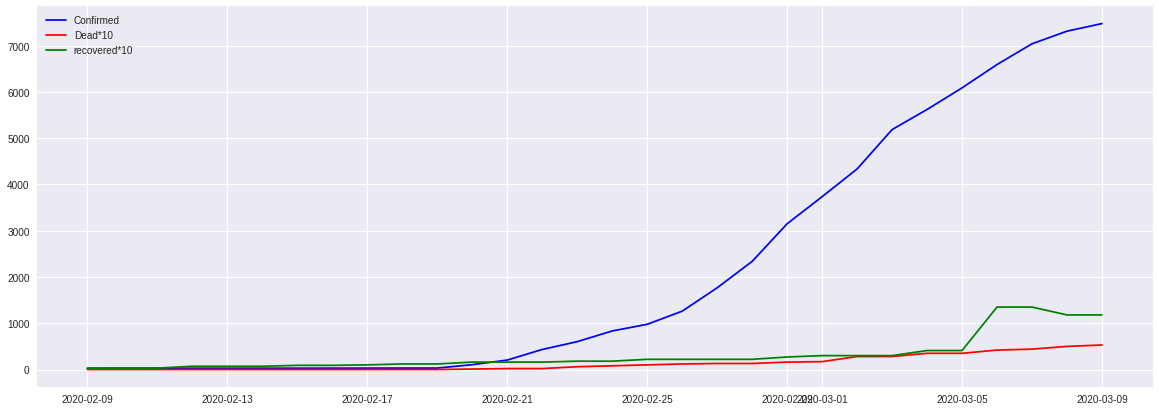

In [115]:
plotRatio('Korea', 30)

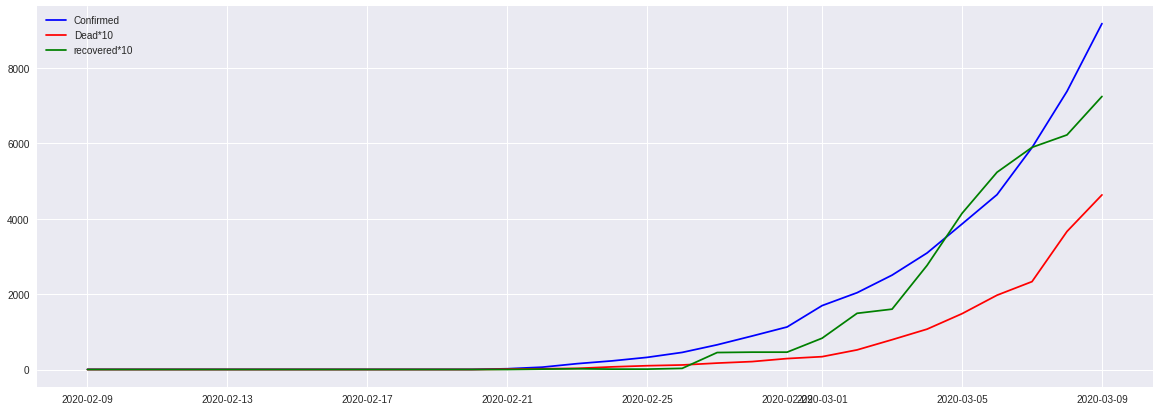

In [110]:
plotRatio('Italy', 30)

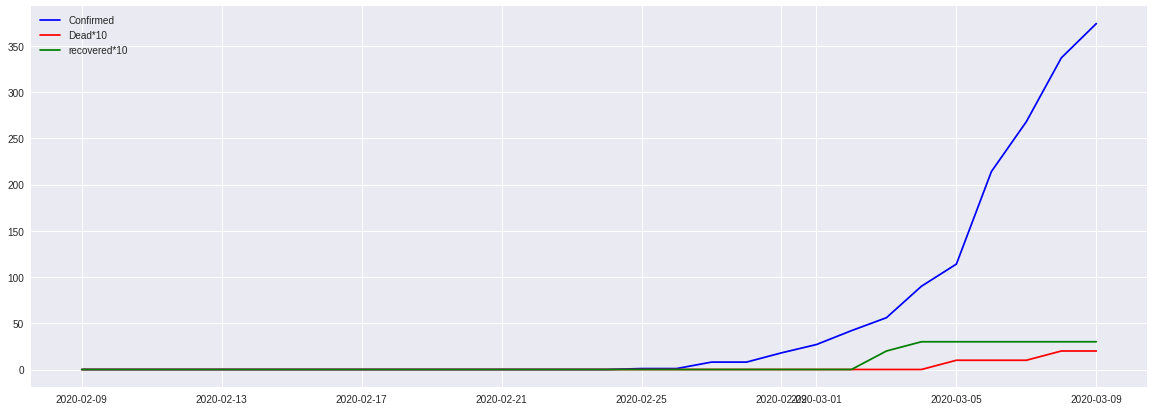

In [111]:
plotRatio('Switzerland', 30)

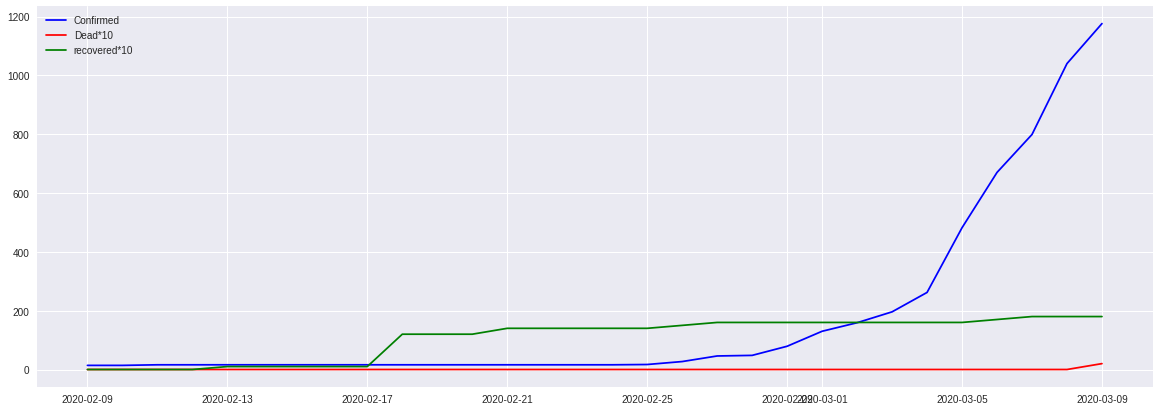

In [112]:
plotRatio('Germany', 30)

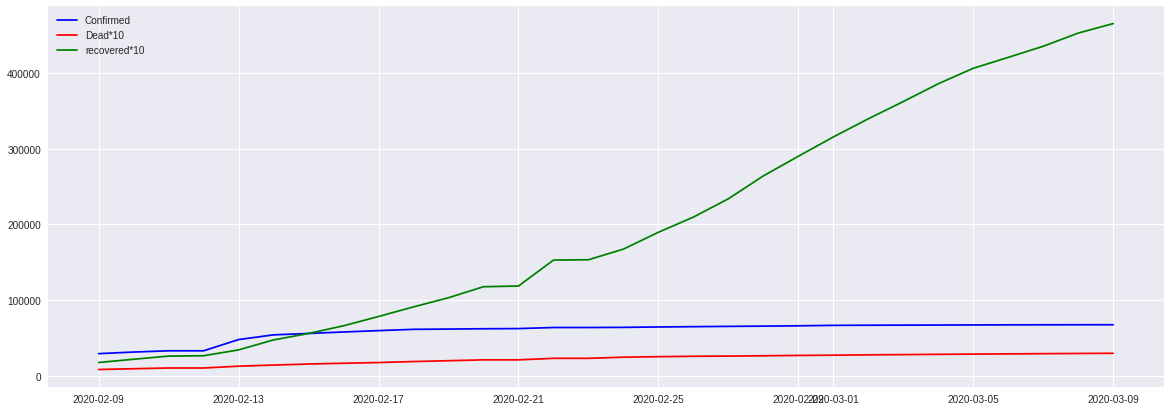

In [116]:
plotRatio('Hubei', 30)

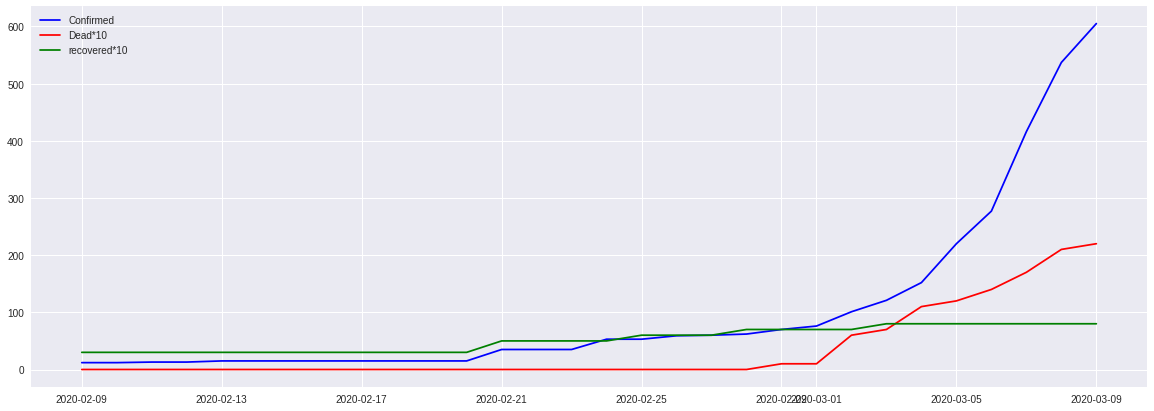

In [134]:
plotRatio('US/Total', 30)

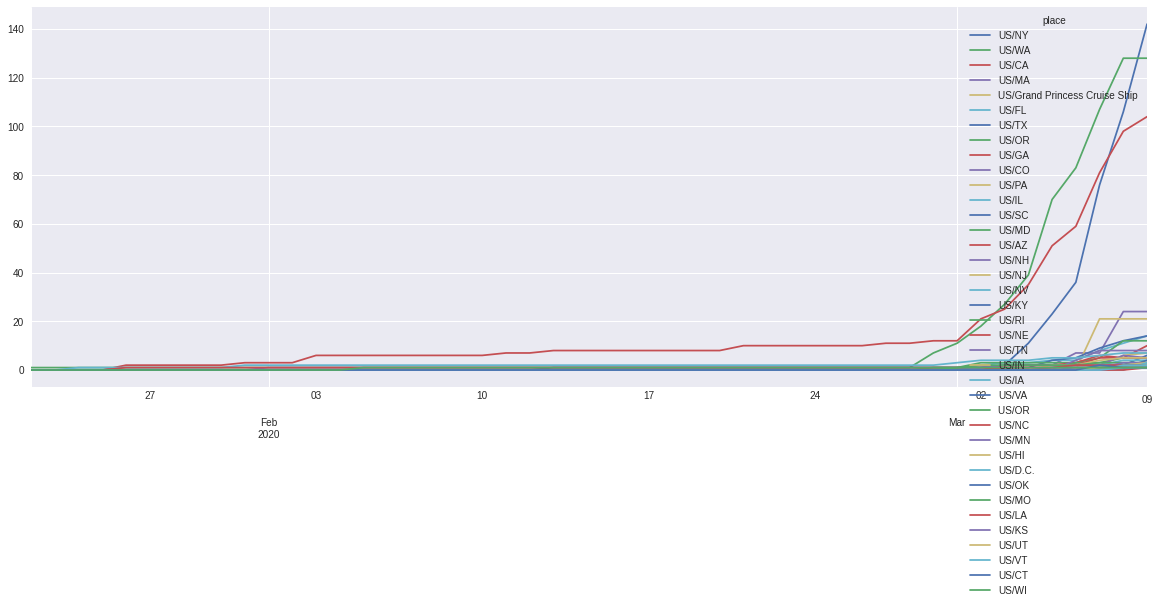

In [135]:
con[con.index.str.contains('US') & (~con.index.str.contains('Total'))].sort_values('3/9/20', ascending=False).T.plot()

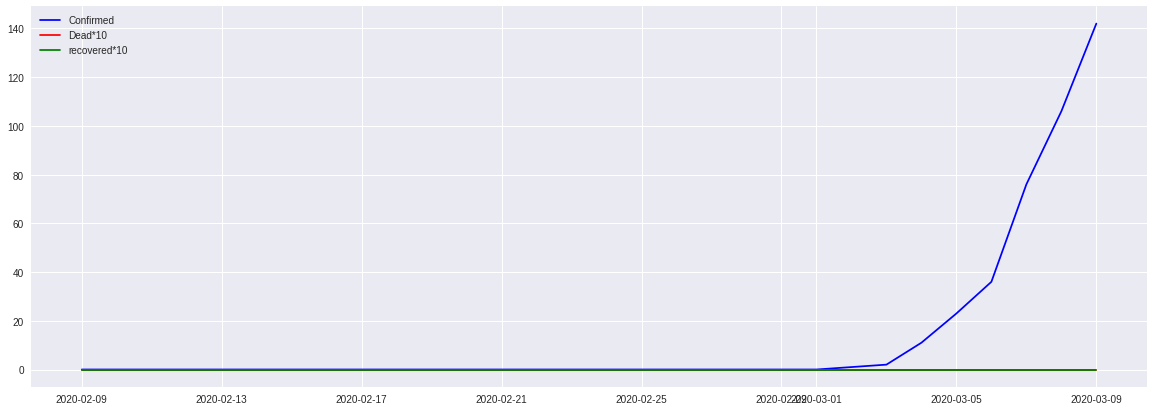

In [133]:
plotRatio('US/NY', 30)

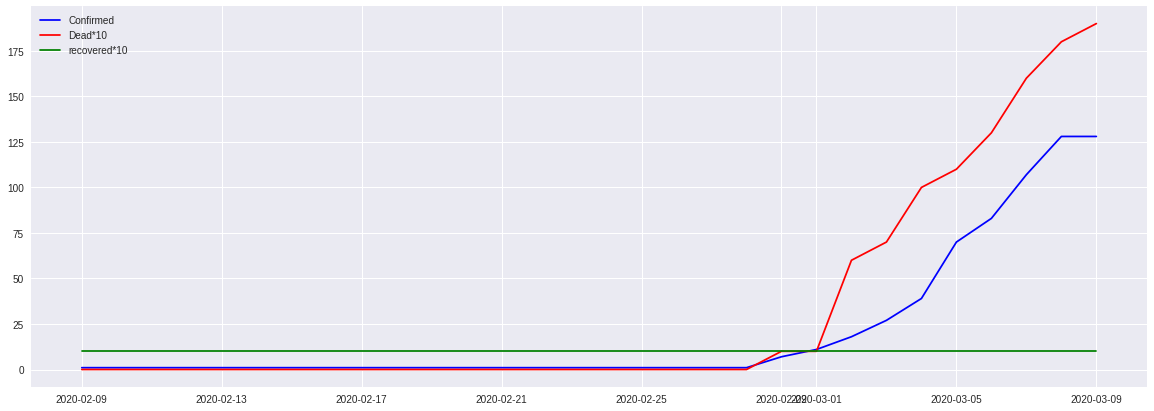

In [136]:
plotRatio('US/WA', 30)

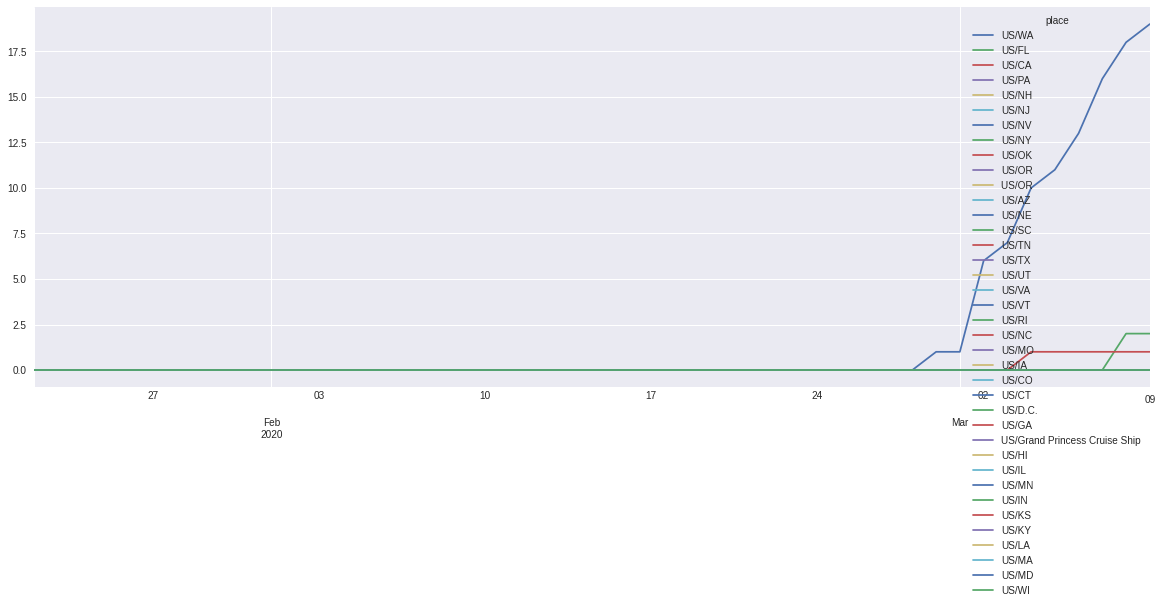

In [139]:
dea[dea.index.str.contains('US') & (~dea.index.str.contains('Total'))].sort_values('3/9/20', ascending=False).T.plot()

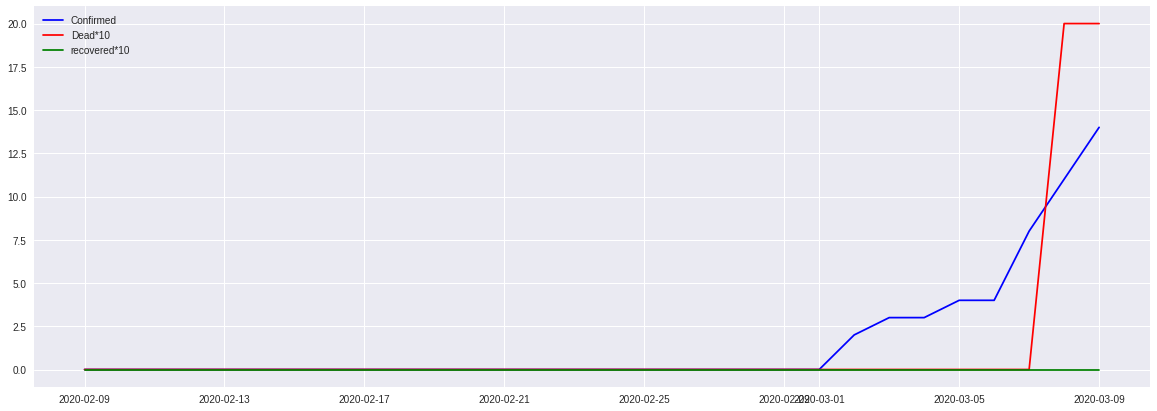

In [141]:
plotRatio('US/FL', 30)

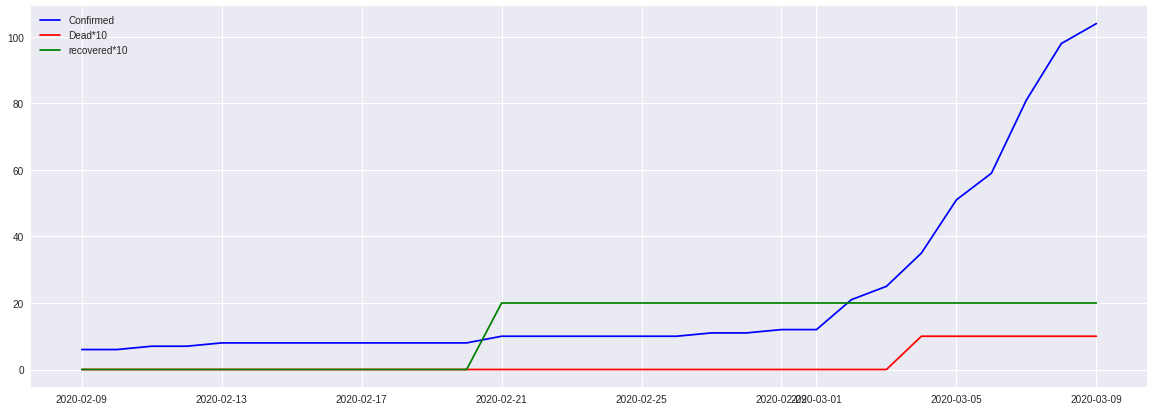

In [142]:
plotRatio('US/CA', 30)

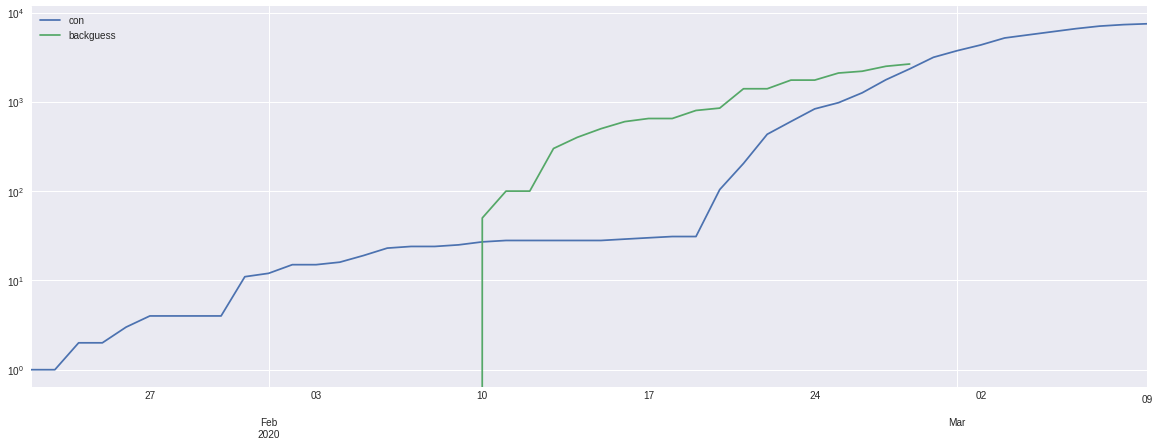

In [256]:
def backGuess(country, T=10, cfr=0.02, log=True):
    return pd.DataFrame({'con': con.loc[country]*1.00, 'backguess': (1/cfr)*dea.loc[country].shift(-T)})
backGuess('South Korea').plot(logy=True)

In [257]:
a = backGuess('South Korea')

In [258]:
backItaly = backGuess('Italy')

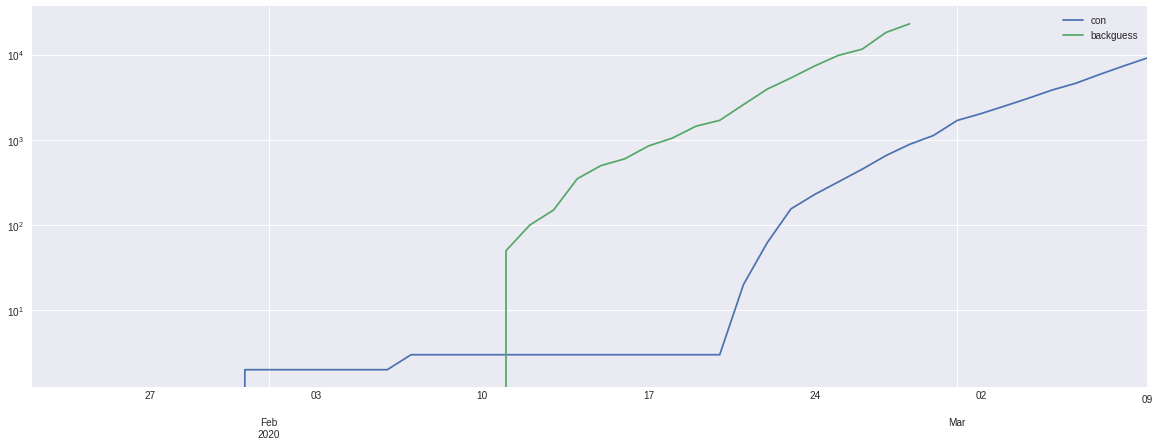

In [259]:
backGuess('Italy').plot(logy=True)

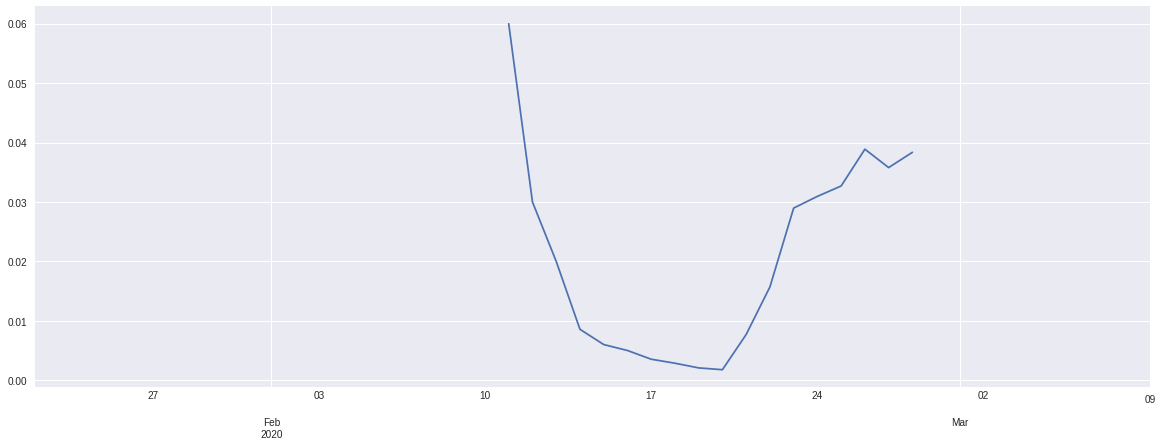

In [260]:
(backItaly.con / backItaly.backguess).plot()

In [261]:
backItaly

,con,backguess
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0
2020-01-30,0.0,0.0
2020-01-31,2.0,0.0


In [262]:
backItaly.backguess / backItaly.backguess.shift(1)

2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         NaN
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-08         NaN
2020-02-09         NaN
2020-02-10         NaN
2020-02-11         inf
2020-02-12    2.000000
2020-02-13    1.500000
2020-02-14    2.333333
2020-02-15    1.428571
2020-02-16    1.200000
2020-02-17    1.416667
2020-02-18    1.235294
2020-02-19    1.380952
2020-02-20    1.172414
2020-02-21    1.529412
2020-02-22    1.519231
2020-02-23    1.354430
2020-02-24    1.383178
2020-02-25    1.331081
2020-02-26    1.182741
2020-02-27    1.570815
2020-02-28    1.265027
2020-02-29         NaN
2020-03-01         NaN
2020-03-02         NaN
2020-03-03         NaN
2020-03-04         NaN
2020-03-05 

In [263]:
backItaly.backguess[-12] / backItaly.backguess[-13]

1.5708154506437768

In [264]:
1.35 ** 8

11.032403768789068

In [265]:
backItaly.backguess[-11]

23150.0

In [266]:
italyNow = backItaly.backguess[-11] * 1.35**11
italyNow

628380.1372839866

In [267]:
backItaly.con[-11]

888.0

In [268]:
backItaly.con / backItaly.backguess

2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         inf
2020-02-01         inf
2020-02-02         inf
2020-02-03         inf
2020-02-04         inf
2020-02-05         inf
2020-02-06         inf
2020-02-07         inf
2020-02-08         inf
2020-02-09         inf
2020-02-10         inf
2020-02-11    0.060000
2020-02-12    0.030000
2020-02-13    0.020000
2020-02-14    0.008571
2020-02-15    0.006000
2020-02-16    0.005000
2020-02-17    0.003529
2020-02-18    0.002857
2020-02-19    0.002069
2020-02-20    0.001765
2020-02-21    0.007692
2020-02-22    0.015696
2020-02-23    0.028972
2020-02-24    0.030946
2020-02-25    0.032690
2020-02-26    0.038884
2020-02-27    0.035792
2020-02-28    0.038359
2020-02-29         NaN
2020-03-01         NaN
2020-03-02         NaN
2020-03-03         NaN
2020-03-04         NaN
2020-03-05 

In [269]:
backItaly.con[-1]

9172.0

In [270]:
backItaly.con[-1] / 0.035

262057.14285714284

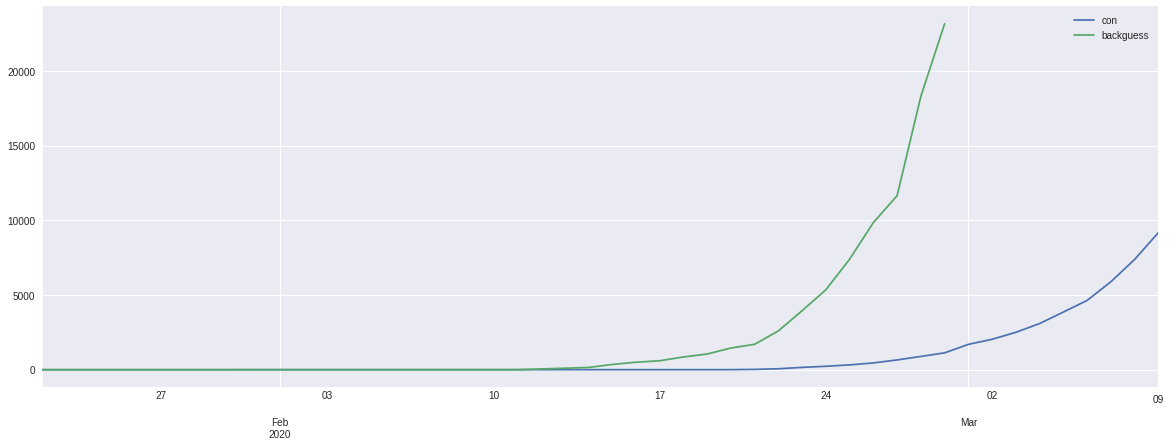

In [271]:
PlotBackGuess('Italy',log=False)

In [272]:
switzerland = backGuess('Switzerland')

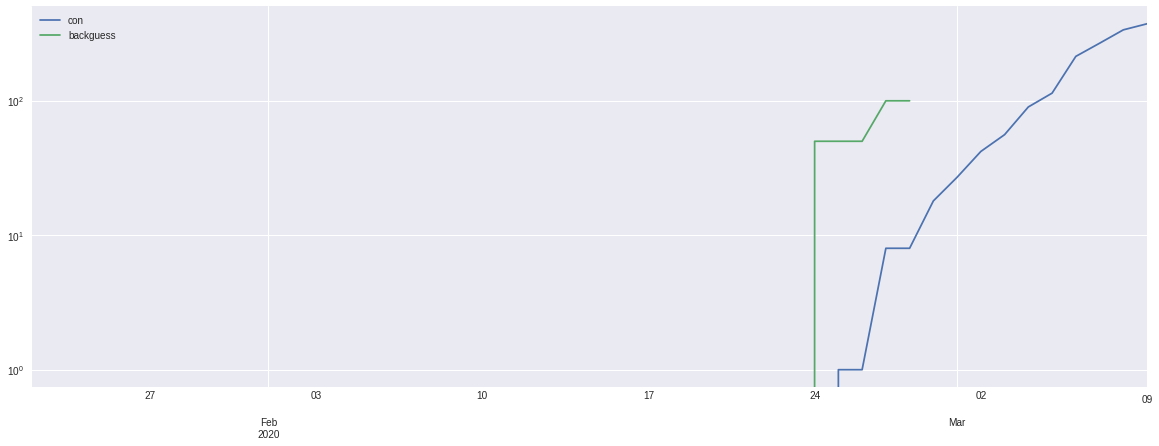

In [273]:
switzerland.plot(logy=True)

In [274]:
switzerland

,con,backguess
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0
2020-01-30,0.0,0.0
2020-01-31,0.0,0.0


In [275]:
switzerland.con / switzerland.backguess

2020-01-22     NaN
2020-01-23     NaN
2020-01-24     NaN
2020-01-25     NaN
2020-01-26     NaN
2020-01-27     NaN
2020-01-28     NaN
2020-01-29     NaN
2020-01-30     NaN
2020-01-31     NaN
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN
2020-02-13     NaN
2020-02-14     NaN
2020-02-15     NaN
2020-02-16     NaN
2020-02-17     NaN
2020-02-18     NaN
2020-02-19     NaN
2020-02-20     NaN
2020-02-21     NaN
2020-02-22     NaN
2020-02-23     NaN
2020-02-24    0.00
2020-02-25    0.02
2020-02-26    0.02
2020-02-27    0.08
2020-02-28    0.08
2020-02-29     NaN
2020-03-01     NaN
2020-03-02     NaN
2020-03-03     NaN
2020-03-04     NaN
2020-03-05     NaN
2020-03-06     NaN
2020-03-07     NaN
2020-03-08     NaN
2020-03-09     NaN
dtype: float64

In [278]:
switzerland

,con,backguess
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0
2020-01-30,0.0,0.0
2020-01-31,0.0,0.0


In [279]:
switzerland.con[-1] / 0.08

4675.0

In [283]:
it = 0.04
ch = 0.0005
ch * 1.35**14

0.033392025491794576

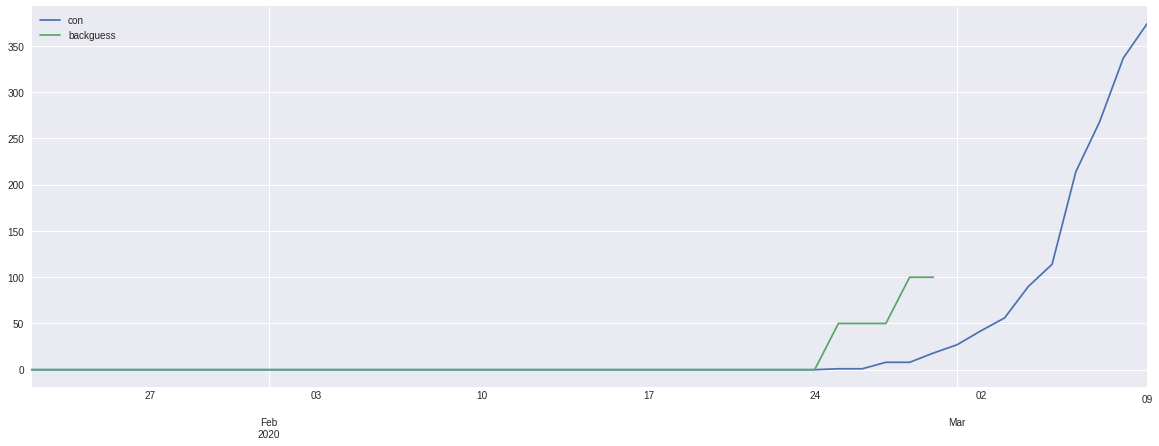

In [193]:
PlotBackGuess('Switzerland', log=False)

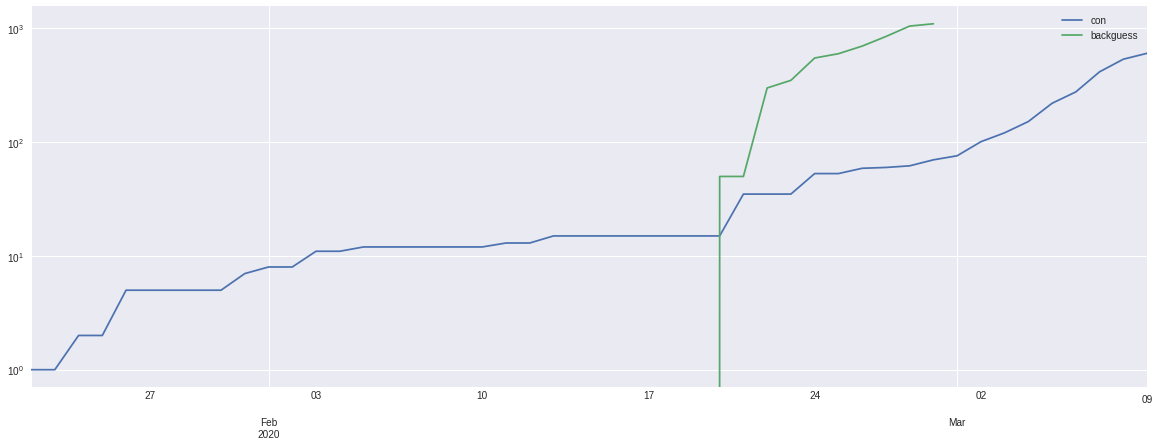

In [195]:
PlotBackGuess('US/Total')